In [ ]:
#Analyze the new cases per quarter from 2020-2022 (OCT)
#SOURCE https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data

In [24]:
#Import Data
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import hvplot.pandas
import numpy as np

In [25]:
#Read Data File
Covid = pd.read_csv(r'C:\Users\18327\Desktop\DataViz-Project1\COVID DATA.csv')

#Format Submission Date to Date/Time
Covid["submission_date"]=pd.to_datetime(Covid["submission_date"])


In [26]:
#Renaming columns
Covid.rename(columns={'submission_date':'Date', 'tot_cases':'Total Case Count', 'new_case': 'New Case Count' }, inplace=True)
#Setting State as index
Covid.set_index('Date', inplace=False)
# Sort the DataFrame by the Date column in ascending order
Covid.sort_values(by='Date', ascending=True, inplace=True)

Covid

,Date,state,Total Case Count,conf_cases,prob_cases,New Case Count,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-01-22,ND,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Not agree
32,2020-01-22,MI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
33,2020-01-22,WY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
34,2020-01-22,VI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,NaN,NaN
35,2020-01-22,NH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60024,2022-10-18,LA,"1,459,308",NaN,NaN,0,0,"18,136","15,261","2,875",0,0,10/19/2022 13:15,Not agree,Agree
60025,2022-10-18,CA,"11,309,237","10,458,792","850,445",0,0,"95,604",NaN,NaN,0,0,10/19/2022 13:15,Agree,Not agree
60026,2022-10-18,VT,"133,845",NaN,NaN,184,39,700,NaN,NaN,0,0,10/19/2022 13:15,Not agree,Not agree
60028,2022-10-18,WY,"178,032","139,079","38,953",397,134,"1,906","1,906",0,2,0,10/19/2022 13:15,Agree,Agree


In [27]:
dates = pd.date_range(start='2020-01-01', end='2022-10-31', freq='Q')
quarters = dates.to_period("Q")

Covid

,Date,state,Total Case Count,conf_cases,prob_cases,New Case Count,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-01-22,ND,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Not agree
32,2020-01-22,MI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
33,2020-01-22,WY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree
34,2020-01-22,VI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,NaN,NaN
35,2020-01-22,NH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60024,2022-10-18,LA,"1,459,308",NaN,NaN,0,0,"18,136","15,261","2,875",0,0,10/19/2022 13:15,Not agree,Agree
60025,2022-10-18,CA,"11,309,237","10,458,792","850,445",0,0,"95,604",NaN,NaN,0,0,10/19/2022 13:15,Agree,Not agree
60026,2022-10-18,VT,"133,845",NaN,NaN,184,39,700,NaN,NaN,0,0,10/19/2022 13:15,Not agree,Not agree
60028,2022-10-18,WY,"178,032","139,079","38,953",397,134,"1,906","1,906",0,2,0,10/19/2022 13:15,Agree,Agree


In [28]:
# ADD IN BINNING BY DATE
Covid['Quarter'] = Covid['Date'].dt.quarter
Covid['Quarter'] = Covid['Quarter'].apply(lambda x: 'Q' + str(x))

Covid['Period'] = Covid['Date'].dt.strftime('%Y') + "-" + Covid['Quarter']

Covid.drop(columns=['Quarter'], inplace=True)
Covid

,Date,state,Total Case Count,conf_cases,prob_cases,New Case Count,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Period
0,2020-01-22,ND,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Not agree,2020-Q1
32,2020-01-22,MI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree,2020-Q1
33,2020-01-22,WY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Agree,Agree,2020-Q1
34,2020-01-22,VI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,NaN,NaN,2020-Q1
35,2020-01-22,NH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Not agree,2020-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60024,2022-10-18,LA,"1,459,308",NaN,NaN,0,0,"18,136","15,261","2,875",0,0,10/19/2022 13:15,Not agree,Agree,2022-Q4
60025,2022-10-18,CA,"11,309,237","10,458,792","850,445",0,0,"95,604",NaN,NaN,0,0,10/19/2022 13:15,Agree,Not agree,2022-Q4
60026,2022-10-18,VT,"133,845",NaN,NaN,184,39,700,NaN,NaN,0,0,10/19/2022 13:15,Not agree,Not agree,2022-Q4
60028,2022-10-18,WY,"178,032","139,079","38,953",397,134,"1,906","1,906",0,2,0,10/19/2022 13:15,Agree,Agree,2022-Q4


In [29]:
# Group the data
grouped_Covid = Covid.groupby(["Period"])

#Clean Up New Case Column
Covid.replace(',','', regex=True,inplace=True)
Covid['New Case Count'] = Covid['New Case Count'].astype(str).astype(float)

# Sum New Cases
Covid = Covid.groupby('Period')['New Case Count'].sum()
Covid


Period
2020-Q1      212138.0
2020-Q2     2482590.0
2020-Q3     4635040.0
2020-Q4    12733265.0
2021-Q1    10224559.0
2021-Q2     3137306.0
2021-Q3     9746680.0
2021-Q4    11383831.0
2022-Q1    24976034.0
2022-Q2     7385358.0
2022-Q3     8622030.0
2022-Q4      641828.0
Name: New Case Count, dtype: float64

In [36]:
#Reset Index
reset_Covid = Covid.reset_index()
reset_Covid

,Period,New Case Count
0,2020-Q1,212138.0
1,2020-Q2,2482590.0
2,2020-Q3,4635040.0
3,2020-Q4,12733265.0
4,2021-Q1,10224559.0
5,2021-Q2,3137306.0
6,2021-Q3,9746680.0
7,2021-Q4,11383831.0
8,2022-Q1,24976034.0
9,2022-Q2,7385358.0


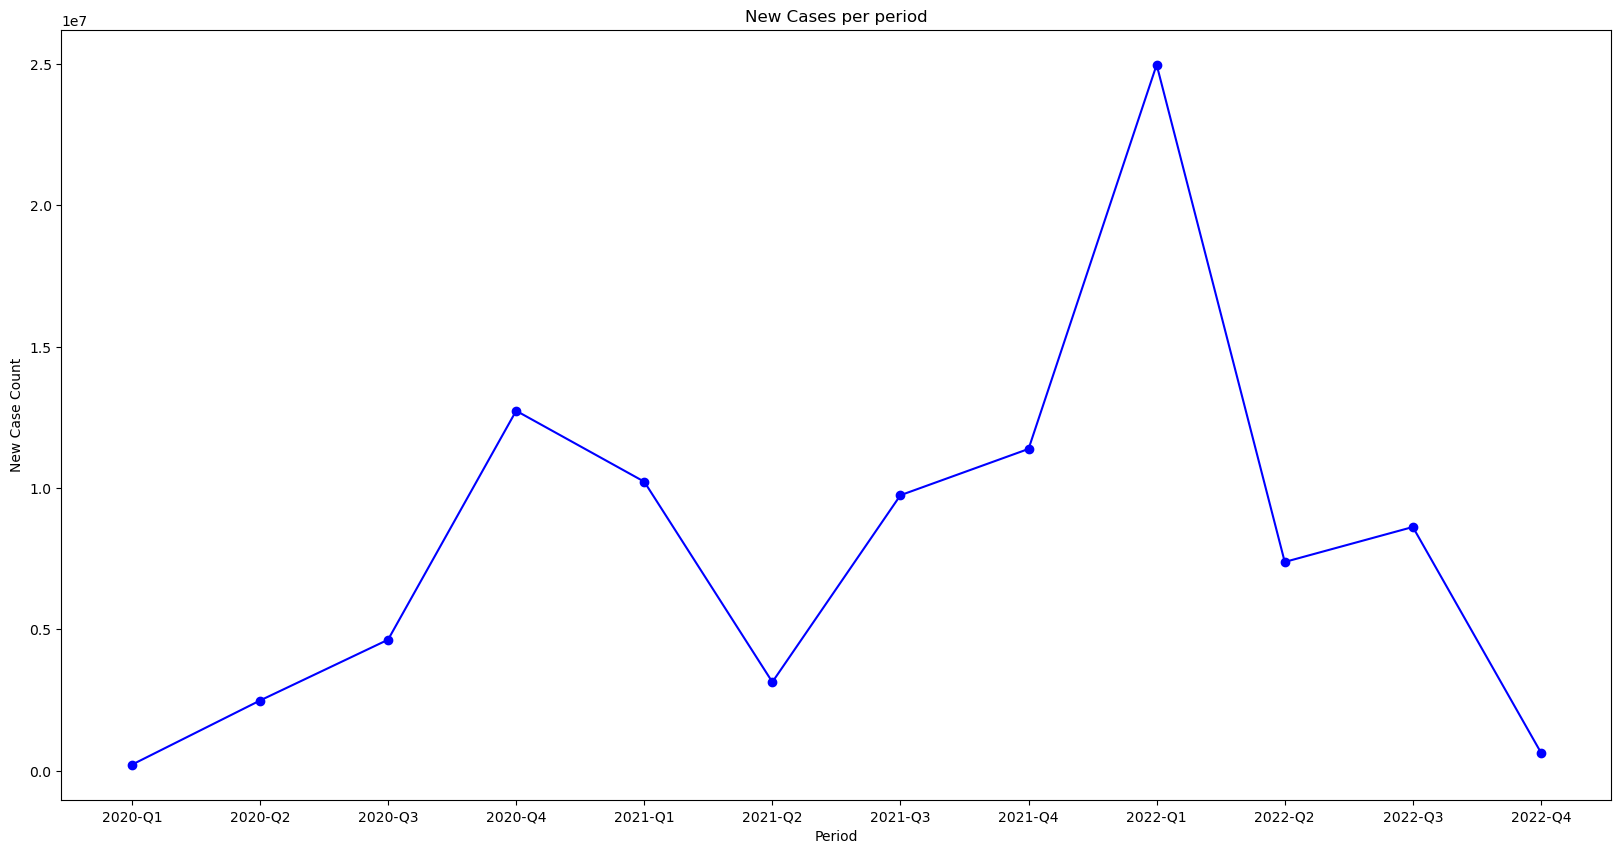

In [37]:
#Create Chart

plt.figure(figsize=(20,10))

plt.plot(reset_Covid['Period'],reset_Covid['New Case Count'],marker ='o', color='blue')
plt.ylabel('New Case Count')
plt.xlabel('Period')
plt.title('New Cases per period')
plt.show()